In [1]:
import pandas as pd
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('thelook_ecommerce.csv')

### Basic Data Exploration

In [4]:
# Get the first few rows
df.head()

,order_id,order_date,product_id,category,name,brand,cost,retail_price,department,distribution_center,...,first_name,last_name,age,gender,state,city,country,lat,long,traffic_source
0,105987,2024-06-24 16:55:00 UTC,28462,Accessories,Plain Adjustable Velcro Hats (Many Colors Avai...,Plain Hats,2.000990,4.990000,Men,1,...,Patrick,Sweeney,67,M,Grand Est,Nancy,France,48.688892,6.178068,Organic
1,20891,2024-01-28 02:31:00 UTC,23864,Outerwear & Coats,Men's Moncler Down Vest Tib,Moncler,238.150001,550.000000,Men,1,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
2,98935,2024-08-30 10:39:00 UTC,17506,Fashion Hoodies & Sweatshirts,Nintendo Super Mario Bros. Characters Zip Hoodie,Hot Topic,25.938000,49.500000,Men,10,...,Daniel,Nicholson,55,M,Illinois,Marion,United States,37.718773,-88.910496,Search
3,20891,2024-01-28 02:31:00 UTC,16423,Tops & Tees,DC Men's Grady Aint Tee,DC,13.608000,24.000000,Men,4,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
4,85342,2024-05-17 01:44:00 UTC,23750,Outerwear & Coats,London Fog Men's Durham Single-Breasted Fly-Fr...,London Fog,49.275519,109.989998,Men,7,...,Derrick,Ward,12,M,Virginia,Sterling,United States,39.012047,-77.396186,Organic


In [5]:
# Get number of rows and columns
df.shape

(45374, 21)

In [6]:
# Get count of non-null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45374 entries, 0 to 45373
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             45374 non-null  int64  
 1   order_date           45374 non-null  object 
 2   product_id           45374 non-null  int64  
 3   category             45374 non-null  object 
 4   name                 45372 non-null  object 
 5   brand                45349 non-null  object 
 6   cost                 45374 non-null  float64
 7   retail_price         45374 non-null  float64
 8   department           45374 non-null  object 
 9   distribution_center  45374 non-null  int64  
 10  sale_price           45374 non-null  float64
 11  first_name           45374 non-null  object 
 12  last_name            45374 non-null  object 
 13  age                  45374 non-null  int64  
 14  gender               45374 non-null  object 
 15  state                45374 non-null 

In [7]:
# Get summary statistics of numeric values
df.describe()

,order_id,product_id,cost,retail_price,distribution_center,sale_price,age,lat,long
count,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000,45374.000000
mean,62413.411337,15306.959206,28.779838,59.830147,4.972760,59.830147,40.844691,28.310610,24.704970
std,35908.093346,8418.409771,31.074562,67.064761,2.893988,67.064761,17.017043,22.085065,89.915258
min,4.000000,1.000000,0.008300,0.020000,1.000000,0.020000,12.000000,-42.964120,-158.164931
25%,31271.000000,8041.250000,11.431000,24.900000,2.000000,24.900000,26.000000,26.085583,-50.618210
50%,62305.500000,16072.000000,19.873801,39.990002,5.000000,39.990002,41.000000,35.238280,4.412131
75%,93511.000000,22646.750000,34.647818,69.949997,8.000000,69.949997,56.000000,40.750468,116.385652
max,124655.000000,29120.000000,557.151002,999.000000,10.000000,999.000000,70.000000,64.865194,153.490393


### Data Cleaning

#### Missing Values

In [10]:
# Count missing values in each column
df.isnull().sum()

order_id                 0
order_date               0
product_id               0
category                 0
name                     2
brand                   25
cost                     0
retail_price             0
department               0
distribution_center      0
sale_price               0
first_name               0
last_name                0
age                      0
gender                   0
state                    0
city                   412
country                  0
lat                      0
long                     0
traffic_source           0
dtype: int64

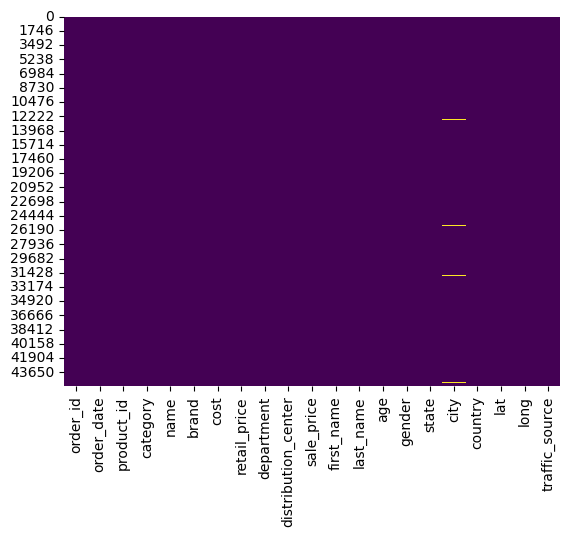

In [11]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [12]:
# Check percentage of missing values
(df.isnull().sum()/df.count())*100

order_id               0.000000
order_date             0.000000
product_id             0.000000
category               0.000000
name                   0.004408
brand                  0.055128
cost                   0.000000
retail_price           0.000000
department             0.000000
distribution_center    0.000000
sale_price             0.000000
first_name             0.000000
last_name              0.000000
age                    0.000000
gender                 0.000000
state                  0.000000
city                   0.916329
country                0.000000
lat                    0.000000
long                   0.000000
traffic_source         0.000000
dtype: float64

In [13]:
# We'll drop the missing values
df = df.dropna()

In [14]:
df.isnull().sum()

order_id               0
order_date             0
product_id             0
category               0
name                   0
brand                  0
cost                   0
retail_price           0
department             0
distribution_center    0
sale_price             0
first_name             0
last_name              0
age                    0
gender                 0
state                  0
city                   0
country                0
lat                    0
long                   0
traffic_source         0
dtype: int64

#### Duplicates

In [16]:
# Find duplicate rows
df.duplicated().sum()

0

In [17]:
# If we want to see what rows are duplicates
for i, row in enumerate(df.duplicated()):
    if row == True:
        print(i, row)
    else:
        pass

In [18]:
# Drop duplicate rows 
df.drop_duplicates(inplace=True)

### Data Aggregation
* Create an orders dataframe that groups order_id and summarizes information from other features. Aggregates information such as:
    - number of products sold per order_id
    - total cost per order_id
    - total sales per order_id
    
* The original df shows information *per transaction*.

In [20]:
df.columns

Index(['order_id', 'order_date', 'product_id', 'category', 'name', 'brand',
       'cost', 'retail_price', 'department', 'distribution_center',
       'sale_price', 'first_name', 'last_name', 'age', 'gender', 'state',
       'city', 'country', 'lat', 'long', 'traffic_source'],
      dtype='object')

In [21]:
# Create orders df that summarizes features per order (the original df is per transaction)
orders = df.groupby(['order_id', 
                     'order_date',
                     'department',
                     'first_name', 
                     'last_name', 
                     'age', 
                     'gender', 
                     'state',
                     'city', 
                     'country', 
                     'lat', 
                     'long']).agg({
    'product_id': 'count', 
    'category': 'count', 
    'name': 'count', 
    'brand': 'count', 
    'cost': 'sum', 
    'retail_price': 'sum',
    'distribution_center': 'count',
    'sale_price': 'sum'})

orders.reset_index(inplace=True)

In [22]:
orders.head()

,order_id,order_date,department,first_name,last_name,age,gender,state,city,country,lat,long,product_id,category,name,brand,cost,retail_price,distribution_center,sale_price
0,4,2021-02-15 04:06:00 UTC,Men,Willie,Shea,27,M,Nordrhein-Westfalen,Tönisvorst,Germany,51.316466,6.452439,2,2,2,2,66.391759,120.129997,2,120.129997
1,5,2024-06-30 01:02:00 UTC,Women,Diane,Avery,46,F,New South Wales,Sydney,Australia,-33.933480,150.918716,1,1,1,1,6.827120,13.990000,1,13.990000
2,9,2024-06-07 01:09:00 UTC,Women,Crystal,Leblanc,67,F,Gyeongsangnam-do,Gimhae City,South Korea,35.194116,128.823499,1,1,1,1,29.160000,60.000000,1,60.000000
3,17,2023-11-22 04:21:00 UTC,Women,Kimberly,Ochoa,57,F,California,Paso Robles,United States,35.663885,-120.771267,1,1,1,1,9.746100,24.990000,1,24.990000
4,21,2022-12-22 00:03:00 UTC,Men,Nicholas,Russell,27,M,Oregon,Springfield,United States,44.096696,-122.837736,1,1,1,1,65.155249,164.949997,1,164.949997


### Univariate Analysis
- Explore individual features

In [24]:
orders.columns

Index(['order_id', 'order_date', 'department', 'first_name', 'last_name',
       'age', 'gender', 'state', 'city', 'country', 'lat', 'long',
       'product_id', 'category', 'name', 'brand', 'cost', 'retail_price',
       'distribution_center', 'sale_price'],
      dtype='object')

For categorical values, check distribution of values

In [26]:
df['category'].value_counts().head(10)

category
Intimates                        3431
Jeans                            3114
Fashion Hoodies & Sweatshirts    2944
Tops & Tees                      2887
Shorts                           2797
Sweaters                         2781
Swim                             2763
Sleep & Lounge                   2686
Accessories                      2401
Outerwear & Coats                2358
Name: count, dtype: int64

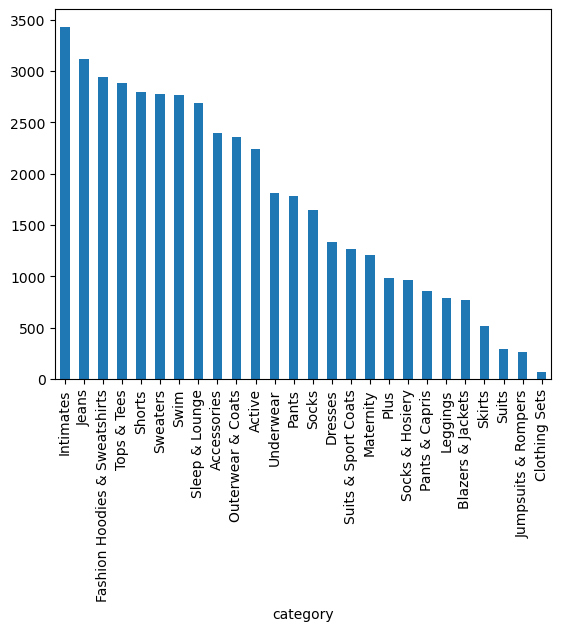

In [27]:
df['category'].value_counts().plot(kind='bar')
plt.show()

In [28]:
orders['country'].value_counts()

country
China             10496
United States      6955
Brasil             4377
South Korea        1719
France             1466
United Kingdom     1457
Germany            1274
Spain              1238
Japan               758
Australia           696
Belgium             431
Poland               66
Austria               3
Colombia              2
Name: count, dtype: int64

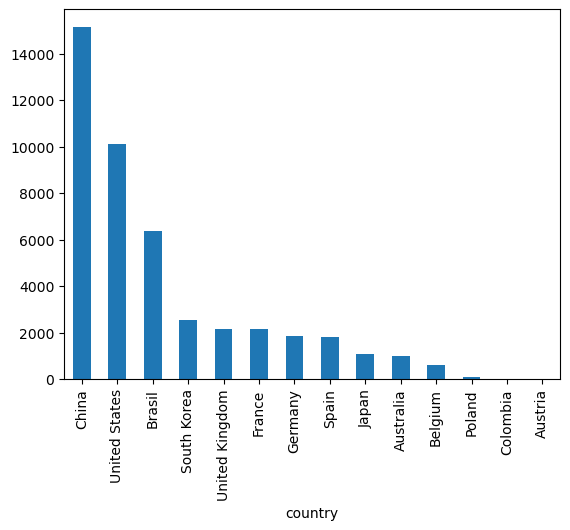

In [29]:
df['country'].value_counts().plot(kind='bar')
plt.show()

In [30]:
orders['gender'].value_counts()

gender
M    15488
F    15450
Name: count, dtype: int64

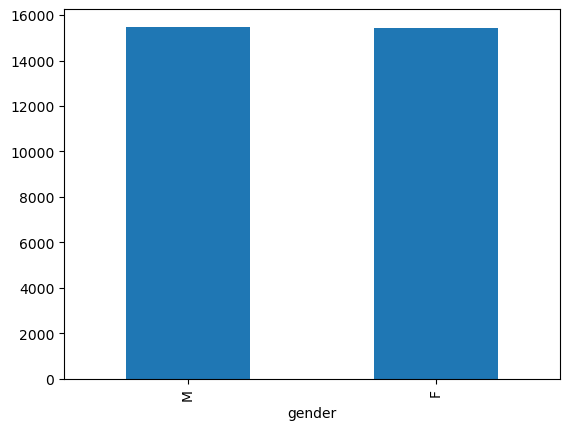

In [31]:
orders['gender'].value_counts().plot(kind='bar')
plt.show()

For numerical values, explore distribution

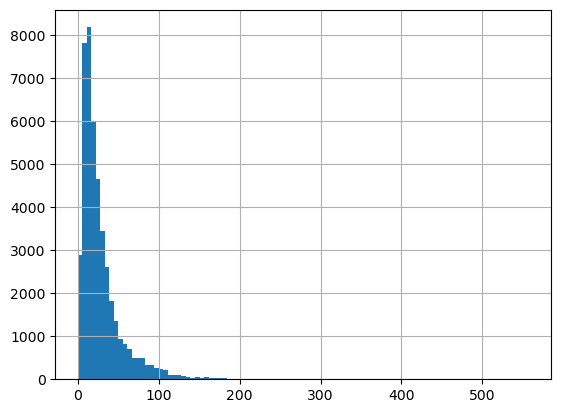

In [33]:
df['cost'].hist(bins=100)
plt.show()

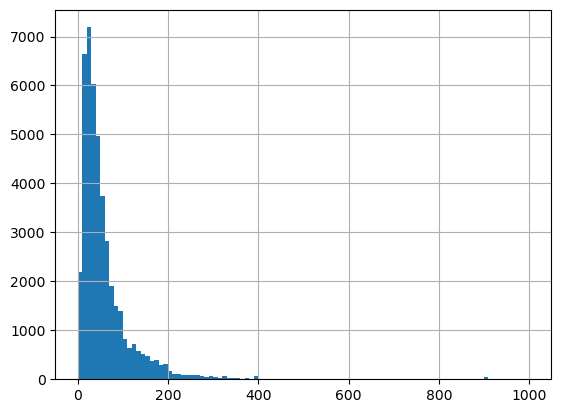

In [34]:
df['retail_price'].hist(bins=100)
plt.show()

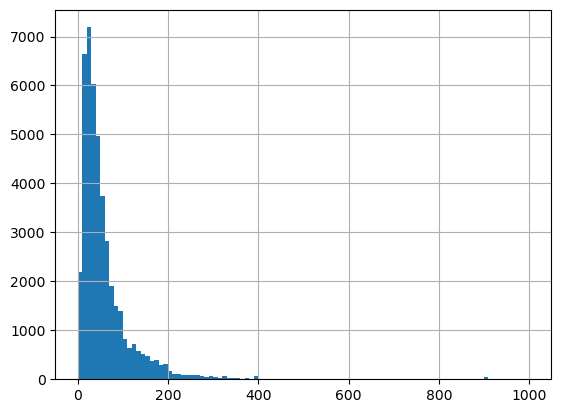

In [35]:
df['sale_price'].hist(bins=100)
plt.show()

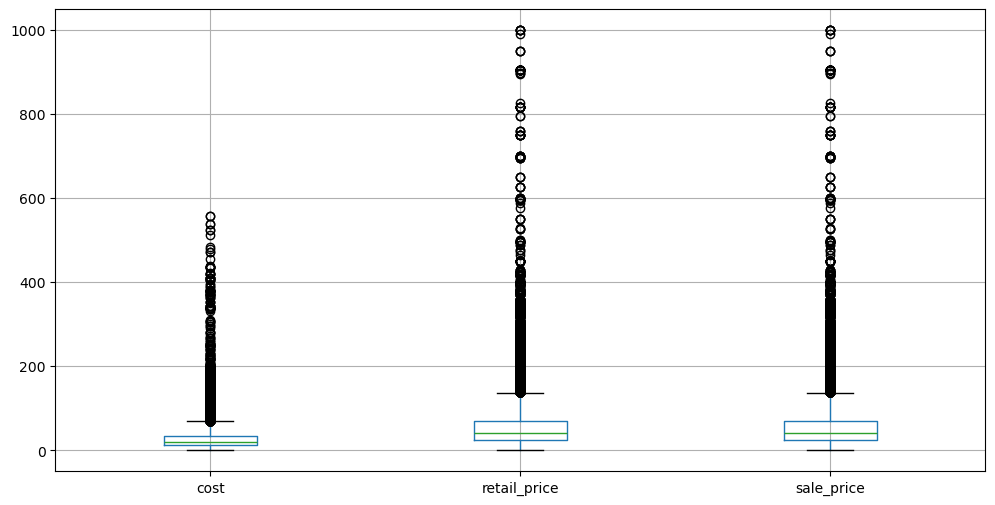

In [36]:
df.boxplot(column=['cost', 'retail_price','sale_price'], figsize=(12,6))
plt.show()

### Bivariate Analysis
- Explore relationships between variables

In [38]:
#set up the general appearance of the plots
sns.set(style='white')
sns.set_context("paper", font_scale=1.5) 

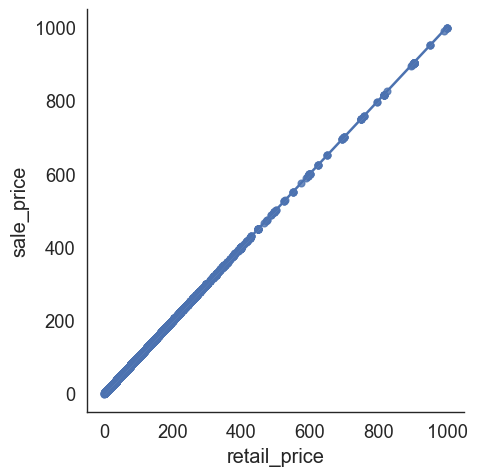

In [39]:
# Numeric vs Numeric
sns.lmplot(x='retail_price', y='sale_price', data=df)
#plt.savefig('.../plots/retail vs sale.png')
plt.show()

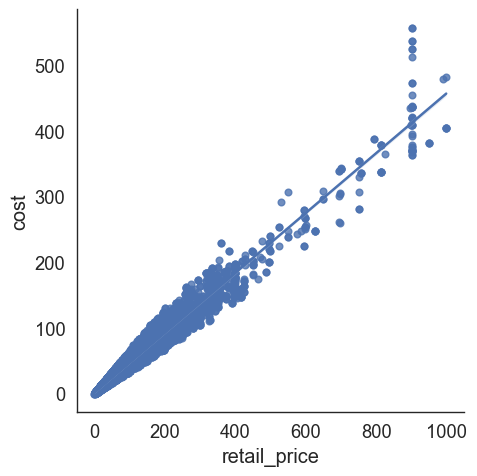

In [40]:
sns.lmplot(x='retail_price', y='cost', data=df)
plt.show()

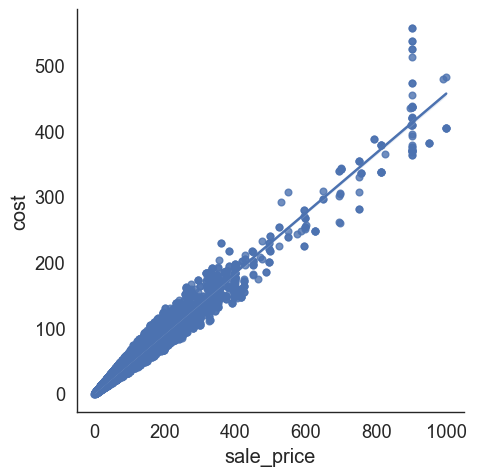

In [41]:
sns.lmplot(x='sale_price', y='cost', data=df)
plt.savefig('.../plots/sale vs cost.png')
plt.show()

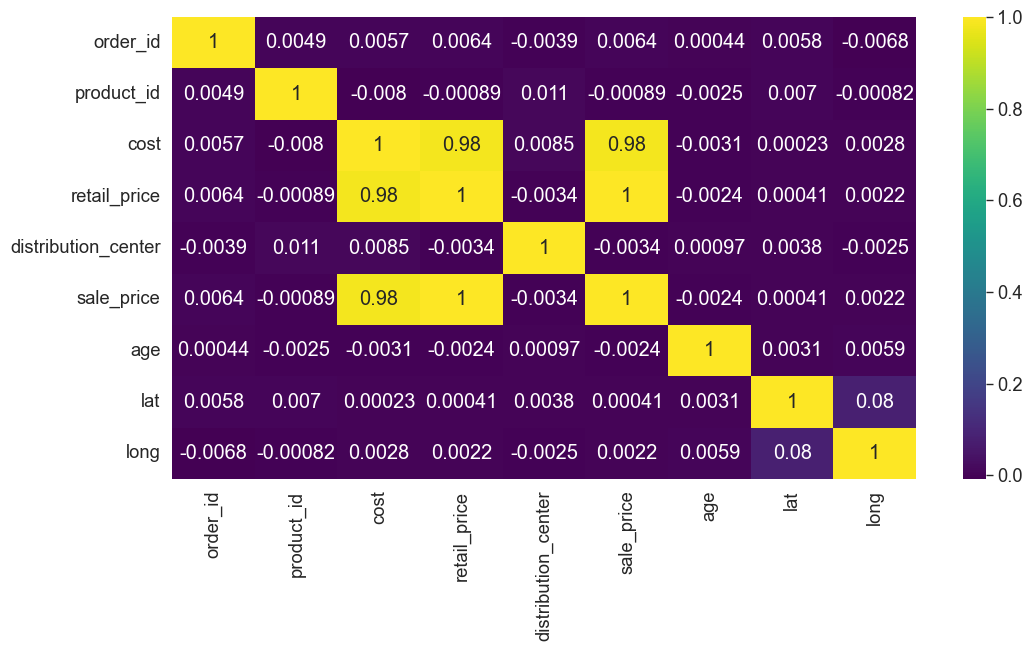

In [42]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

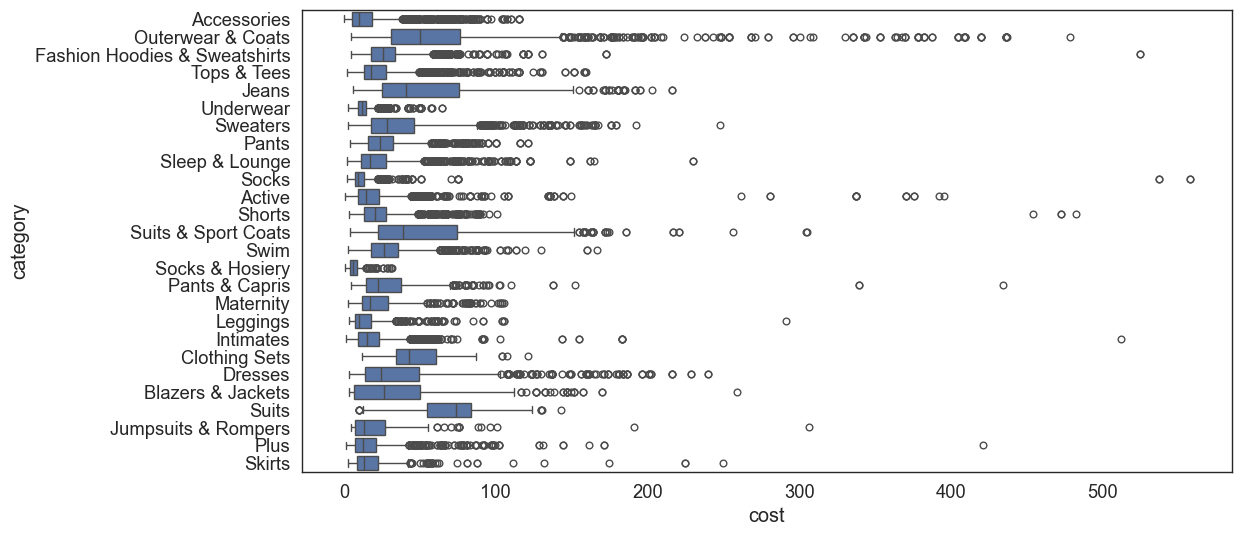

In [43]:
# Catrgorical vs Numeric
plt.figure(figsize=(12, 6))
sns.boxplot(x='cost', y='category', data=df)
plt.show()

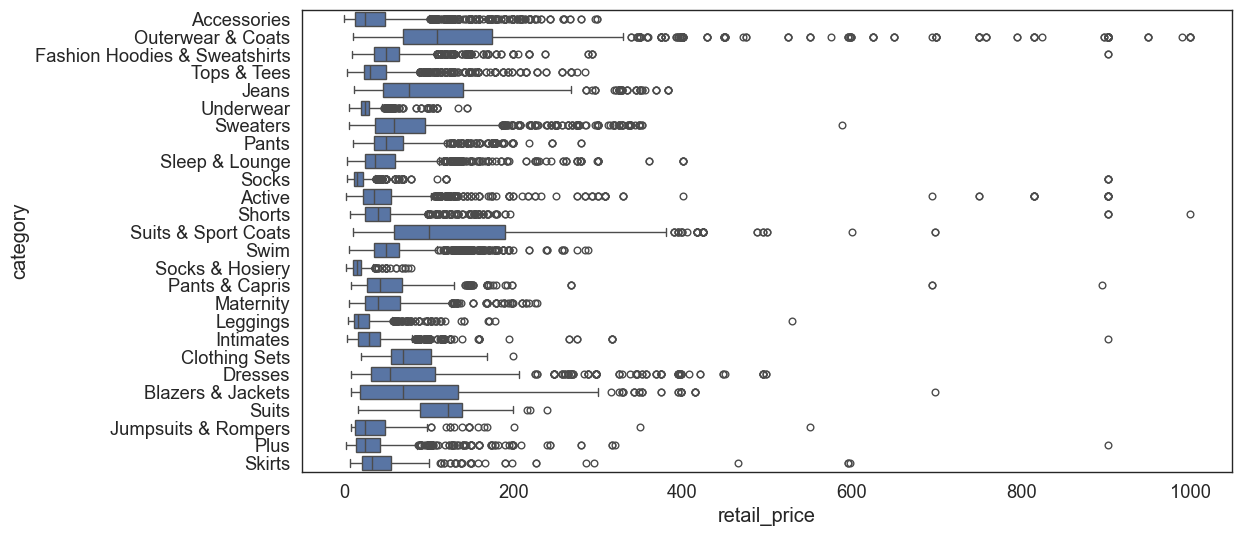

In [44]:
# Catrgorical vs Numeric
plt.figure(figsize=(12, 6))
sns.boxplot(x='retail_price', y='category', data=df)
plt.savefig('.../plots/outliers across categories')
plt.show()

In [119]:
query = "SELECT category, name, retail_price FROM df WHERE category = 'Shorts' AND retail_price >= 800"

# Execute the query
result = psql.sqldf(query, locals())

# Display the result
result

,category,name,retail_price
0,Shorts,Alpha Industries Rip Stop Short,999.0
1,Shorts,Quiksilver Men's Rockefeller Walkshort,903.0
2,Shorts,Quiksilver Men's Rockefeller Walkshort,903.0
3,Shorts,AIR JORDAN DOMINATE SHORTS MENS 465071-100,903.0


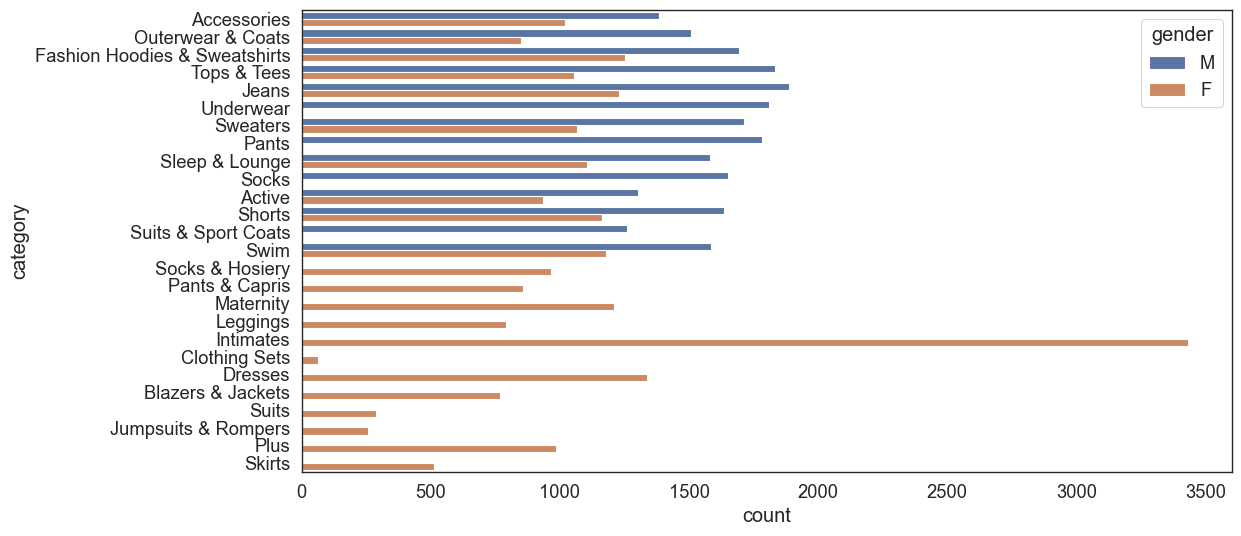

In [46]:
# Catrgorical vs Categorical
plt.figure(figsize=(12, 6))
sns.countplot(y='category', hue='gender', data=df)
plt.show()

In [47]:
# Let's confirm that some categories don't have male buyers
category_gender_count = df.groupby('category')['gender'].value_counts()
print(category_gender_count)

category                       gender
Accessories                    M         1382
                               F         1019
Active                         M         1301
                               F          935
Blazers & Jackets              F          767
Clothing Sets                  F           63
Dresses                        F         1336
Fashion Hoodies & Sweatshirts  M         1693
                               F         1251
Intimates                      F         3431
Jeans                          M         1887
                               F         1227
Jumpsuits & Rompers            F          258
Leggings                       F          790
Maternity                      F         1210
Outerwear & Coats              M         1508
                               F          850
Pants                          M         1782
Pants & Capris                 F          857
Plus                           F          985
Shorts                         M         1

### Feature Engineering
* Create new features from existing data

In [49]:
df.head()

,order_id,order_date,product_id,category,name,brand,cost,retail_price,department,distribution_center,...,first_name,last_name,age,gender,state,city,country,lat,long,traffic_source
0,105987,2024-06-24 16:55:00 UTC,28462,Accessories,Plain Adjustable Velcro Hats (Many Colors Avai...,Plain Hats,2.000990,4.990000,Men,1,...,Patrick,Sweeney,67,M,Grand Est,Nancy,France,48.688892,6.178068,Organic
1,20891,2024-01-28 02:31:00 UTC,23864,Outerwear & Coats,Men's Moncler Down Vest Tib,Moncler,238.150001,550.000000,Men,1,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
2,98935,2024-08-30 10:39:00 UTC,17506,Fashion Hoodies & Sweatshirts,Nintendo Super Mario Bros. Characters Zip Hoodie,Hot Topic,25.938000,49.500000,Men,10,...,Daniel,Nicholson,55,M,Illinois,Marion,United States,37.718773,-88.910496,Search
3,20891,2024-01-28 02:31:00 UTC,16423,Tops & Tees,DC Men's Grady Aint Tee,DC,13.608000,24.000000,Men,4,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
4,85342,2024-05-17 01:44:00 UTC,23750,Outerwear & Coats,London Fog Men's Durham Single-Breasted Fly-Fr...,London Fog,49.275519,109.989998,Men,7,...,Derrick,Ward,12,M,Virginia,Sterling,United States,39.012047,-77.396186,Organic


In [50]:
gender_products = df.groupby('gender').agg(product_count=('product_id', 'count'), total_sales=('sale_price', 'sum'))
gender_products['total_sales'] = round(gender_products['total_sales'], 2)

In [51]:
gender_products

,product_count,total_sales
gender,,
F,22309,1251869.32
M,22626,1440077.66


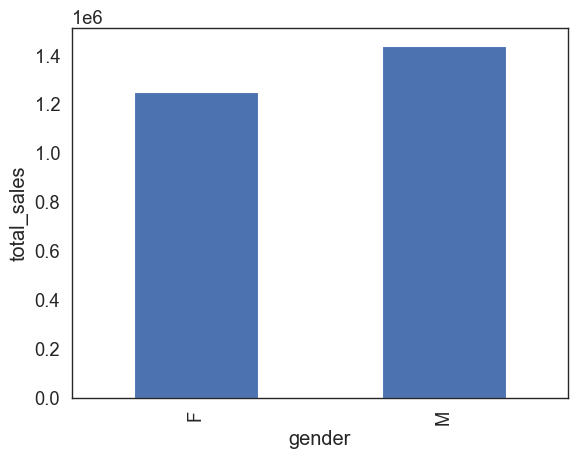

In [52]:
gender_products['total_sales'].plot(kind='bar')
plt.ylabel('total_sales')
plt.show()

In [53]:
df.head(3)

,order_id,order_date,product_id,category,name,brand,cost,retail_price,department,distribution_center,...,first_name,last_name,age,gender,state,city,country,lat,long,traffic_source
0,105987,2024-06-24 16:55:00 UTC,28462,Accessories,Plain Adjustable Velcro Hats (Many Colors Avai...,Plain Hats,2.000990,4.99,Men,1,...,Patrick,Sweeney,67,M,Grand Est,Nancy,France,48.688892,6.178068,Organic
1,20891,2024-01-28 02:31:00 UTC,23864,Outerwear & Coats,Men's Moncler Down Vest Tib,Moncler,238.150001,550.00,Men,1,...,Jeffery,Douglas,58,M,Illinois,Marion,United States,37.718773,-88.910496,Search
2,98935,2024-08-30 10:39:00 UTC,17506,Fashion Hoodies & Sweatshirts,Nintendo Super Mario Bros. Characters Zip Hoodie,Hot Topic,25.938000,49.50,Men,10,...,Daniel,Nicholson,55,M,Illinois,Marion,United States,37.718773,-88.910496,Search


In [215]:
df.isnull().sum()

order_id               0
order_date             0
product_id             0
category               0
name                   0
brand                  0
cost                   0
retail_price           0
department             0
distribution_center    0
sale_price             0
first_name             0
last_name              0
age                    0
age_group              0
gender                 0
state                  0
city                   0
country                0
lat                    0
long                   0
traffic_source         0
dtype: int64

In [54]:
# Date transformation
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed')
orders['order_date'] = pd.to_datetime(df['order_date'], format='mixed')

In [55]:
orders.head()

,order_id,order_date,department,first_name,last_name,age,gender,state,city,country,lat,long,product_id,category,name,brand,cost,retail_price,distribution_center,sale_price
0,4,2024-06-24 16:55:00+00:00,Men,Willie,Shea,27,M,Nordrhein-Westfalen,Tönisvorst,Germany,51.316466,6.452439,2,2,2,2,66.391759,120.129997,2,120.129997
1,5,2024-01-28 02:31:00+00:00,Women,Diane,Avery,46,F,New South Wales,Sydney,Australia,-33.933480,150.918716,1,1,1,1,6.827120,13.990000,1,13.990000
2,9,2024-08-30 10:39:00+00:00,Women,Crystal,Leblanc,67,F,Gyeongsangnam-do,Gimhae City,South Korea,35.194116,128.823499,1,1,1,1,29.160000,60.000000,1,60.000000
3,17,2024-01-28 02:31:00+00:00,Women,Kimberly,Ochoa,57,F,California,Paso Robles,United States,35.663885,-120.771267,1,1,1,1,9.746100,24.990000,1,24.990000
4,21,2024-05-17 01:44:00+00:00,Men,Nicholas,Russell,27,M,Oregon,Springfield,United States,44.096696,-122.837736,1,1,1,1,65.155249,164.949997,1,164.949997


In [193]:
#orders.drop(['year','month','day_of_week'],axis=1,inplace=True)

In [195]:
# Inserting columns based on date
# Mapping months and days

mmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
dmap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'}

orders.insert(loc=2, column='month', value=orders['order_date'].apply(lambda date:date.month))
orders.insert(loc=3, column='year', value=orders['order_date'].apply(lambda date:date.year))
orders.insert(loc=4, column='day_of_week', value=orders['order_date'].apply(lambda date:date.day_of_week))

#orders['year'] = orders['year'].apply(lambda year:int(year))
#orders['year'] = orders['year'].apply(lambda year:str(year))

year_sales = orders.groupby('year').agg(total_sales=('sale_price', 'sum'))
month_sales = orders.groupby('month').agg(total_sales=('sale_price', 'sum'))
day_sales = orders.groupby('day_of_week').agg(total_sales=('sale_price', 'sum'))

year_sales['total_sales'] = round(year_sales['total_sales'], 2)
month_sales['total_sales'] = round(month_sales['total_sales'], 2)
day_sales['total_sales'] = round(day_sales['total_sales'], 2)

year_sales.reset_index(inplace=True)
month_sales.reset_index(inplace=True)
day_sales.reset_index(inplace=True)

year_sales.sort_values('year', ascending=True)
month_sales.sort_values('month', ascending=True)
day_sales.sort_values('day_of_week', ascending=True)

orders['month'] = orders['month'].map(mmap)
month_sales['month'] = month_sales['month'].map(mmap)

orders['day_of_week'] = orders['day_of_week'].map(dmap)
day_sales['day_of_week'] = day_sales['day_of_week'].map(dmap)

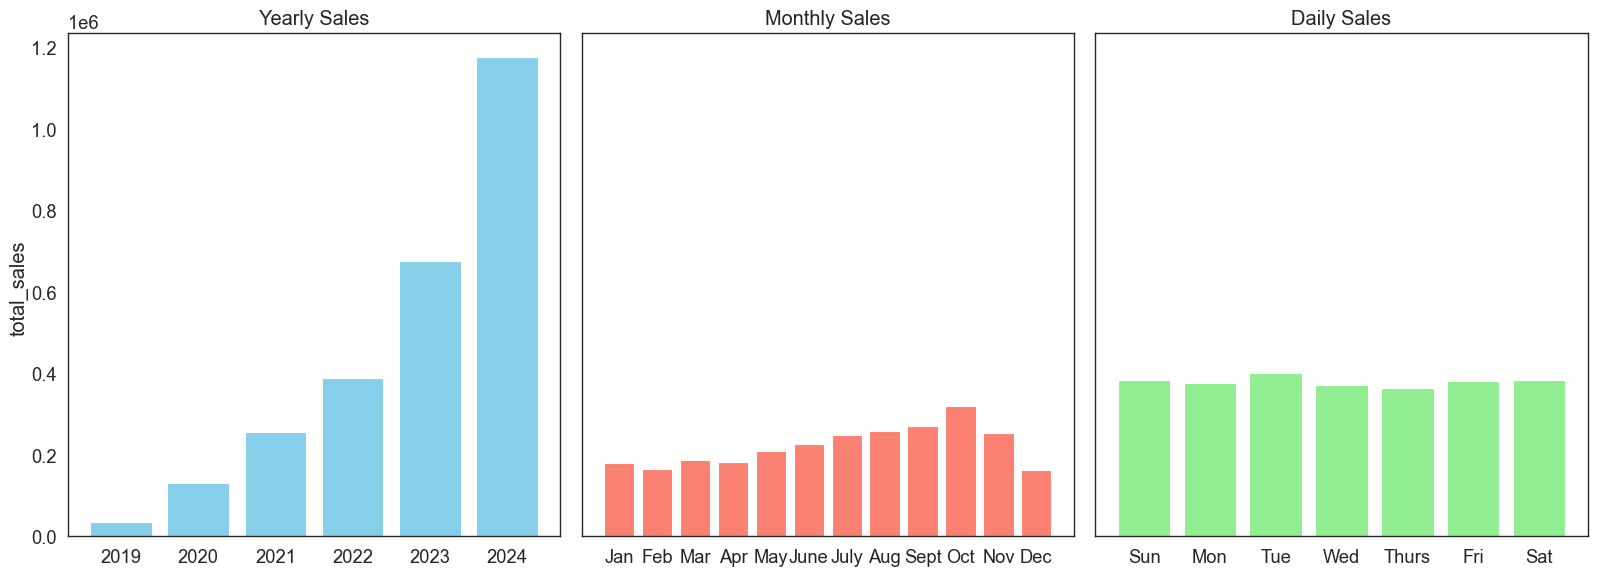

In [197]:
# Create subplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Plot each bar plot on a different subplot
axs[0].bar(year_sales['year'], year_sales['total_sales'], color='skyblue')
axs[0].set_title('Yearly Sales')

axs[1].bar(month_sales['month'], month_sales['total_sales'], color='salmon')
axs[1].set_title('Monthly Sales')

axs[2].bar(day_sales['day_of_week'], day_sales['total_sales'], color='lightgreen')
axs[2].set_title('Daily Sales')

# Set common y-axis label
fig.text(0.0005, 0.5, 'total_sales', va='center', rotation='vertical')

# Show the plot
plt.tight_layout()
plt.show()

In [213]:
orders.isnull().sum()

order_id                 0
order_date             283
month                  283
year                   283
day_of_week            283
department               0
first_name               0
last_name                0
age                      0
gender                   0
state                    0
city                     0
country                  0
lat                      0
long                     0
product_id               0
category                 0
name                     0
brand                    0
cost                     0
retail_price             0
distribution_center      0
sale_price               0
dtype: int64

In [59]:
# Bin numerical values
df.insert(loc=14, column="age_group", value=pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['children', 'youth', 'adult', 'middle-aged', 'senior']))

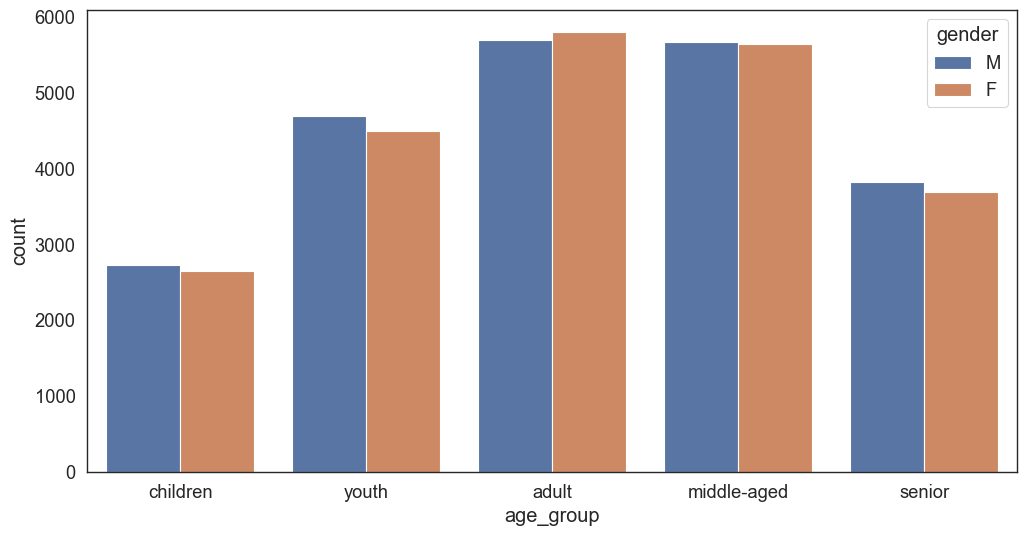

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', hue='gender', data=df)
plt.show()

### Outlier Detection

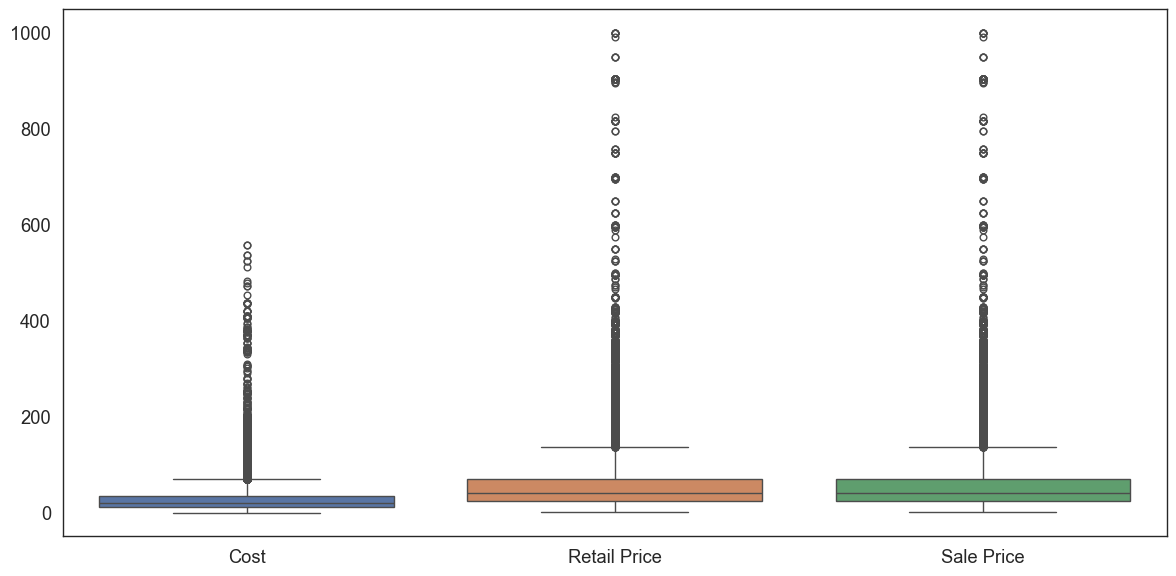

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(data=[df['cost'],df['retail_price'],df['sale_price']])
xvalues=['Cost','Retail Price','Sale Price']
plt.xticks(np.arange(3),xvalues)
plt.tight_layout()
plt.savefig('.../plots/outliers')
plt.show()

### Summary Findings

* **Retail price and sale price are identical**: Which means both features could be used to compute for total sales.